2204
1755 events
not car


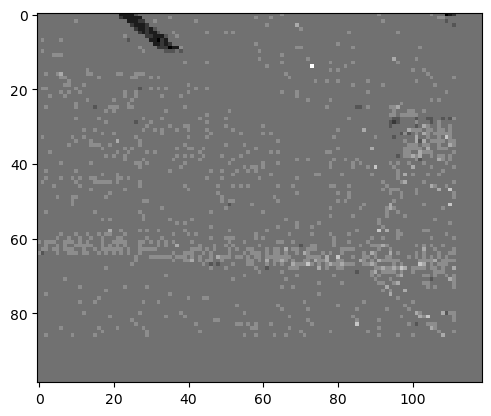

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm, trange
from PIL import Image, ImageDraw


def load_ncal(raw_file: str):
    f = open(raw_file, 'rb')
    raw_data = np.fromfile(f, dtype=np.uint8)
    f.close()

    raw_data = np.uint32(raw_data)
    all_y = raw_data[1::5]
    all_x = raw_data[0::5]
    all_p = (raw_data[2::5] & 128) >> 7  # bit 7
    all_ts = ((raw_data[2::5] & 127) << 16) | (raw_data[3::5] << 8) | (raw_data[4::5])
    all_ts = all_ts / 1e6  # µs -> s
    all_p = all_p.astype(np.float64)
    all_p[all_p == 0] = -1
    events = np.column_stack((all_x, all_y, all_ts, all_p))

    events = events[:16000, :]

    return events

def show_events(mode: str = 'test', seq: int = 0):
    path = f"/space/yyang22/datasets/data/storage/ncars/{mode}/sequence_{seq}/"
    # path = "/space/yyang22/datasets/data/storage/ncars/training/sequence_7/"
    events = np.loadtxt(path+'events.txt')
    is_car = np.loadtxt(path+'is_car.txt')


    events_x = events[:,0].astype(int)
    events_y = events[:,1].astype(int)
    max_x = events_x.max()
    max_y = events_y.max()
    # if abs(max_x - 119) > 0.5:
    #     return max_x
    events_t = events[:,2]
    events_p = (events[:,3] - 0.5)*2
    # events_p = events[:,3]
    # print(events_p)
    events_point = events[:,0:2].astype(int)


    print(f'{len(events)} events')
    if is_car == 1: print('is car')
    else: print('not car')

    # grid_x = np.arange(0, max_x+1, 1)
    # grid_y = np.arange(0, max_y+1, 1)
    # h = np.zeros((max_x+1, max_y+1))

    h = np.zeros((120,100))

    for i in range(events_point.shape[0]):
        idx_x = events_point[i,0]
        idx_y = events_point[i,1]
        h[idx_x,idx_y] += events_p[i]

    # for i in range(1000):
    #     idx_x = events_point[i,0]
    #     idx_y = events_point[i,1]
    #     h[idx_x,idx_y] += events_p[i]

    # Method 1
    # fig,ax = plt.subplots()
    # # levels = ((h.max()-h.min())*10).astype(int)
    # levels = 1000
    # # ax = plt.contourf(h.T, levels=levels, cmap='gray')
    # ax.contourf(h.T, levels=levels, cmap='gray')
    # # ax.axis('scaled')
    # ax.set_xlim(0,119)
    # ax.set_ylim(0,99)
    # ax.invert_yaxis()
    # # cbar = plt.colorbar()
    # plt.show()


    min_value = h.min()
    max_value = h.max()
    max_abs = max(abs(min_value), abs(max_value))

    # pad with squares
    width, height = 119, 99
    # width, height = max_x, max_y
    image = Image.new('L', (width, height))
    draw = ImageDraw.Draw(image)
    for x in range(width):
        for y in range(height):
            value = h[x, y]
            gray_value = int(255 * (value - min_value) / (max_value - min_value))
            draw.rectangle([x, y, x + 1, y + 1], fill=gray_value)

    plt_image = plt.imshow(image, cmap='gray')
    plt.show()

    return max_x

# for i in trange(4289,8600):
#     max_x = show_events('training', i)
#     if abs(max_x - 119) > 0.5:
#         continue
#     else:
#         print(f'sample {i} with max_x {max_x}')
#         break


import numpy as np
id = np.random.randint(8001)
print(id)
max_x = show_events('training', id)


In [ ]:
# colors = []
# for i in range(events.shape[0]):
#     color = 'b' if events[i,3] == 1 else 'r'
#     colors.append(color)
# print(colors)
# fig = plt.figure()
# ax = Axes3D(fig)

# ax.set_xlim(0,np.max(events[:,0]))
# ax.set_zlim(0,np.max(events[:,1]))
# ax.set_ylim(-0.1,0)

# # def update(n):
# #     x = events[n,0]
# #     y = events[n,1]
# #     t = -events[n,2]
# #     c = colors[n]
# #     ax.scatter(x, t, y, c=c, s=0.5)
# # ani = FuncAnimation(fig, update, events.shape[0], interval=100)
# # ani.save('scatter.gif', writer='pillow')

# ax.scatter(events[:,0], -events[:,2], events[:,1], c=colors, s=0.5)

# plt.show()
# fig, ax = plt.subplots()
# ax.scatter(events[:,0], events[:,1], c=colors[:], s=0.5, alpha=0.1)
# plt.show()